# -- Import and read csv --

In [63]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [8]:
data = pd.read_csv('data.csv')

In [13]:
data.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [14]:
data.tail(10)

,Country,Year,Life expectancy at birth (years),GDP
86,Zimbabwe,2006,45.4,5.443896e+09
87,Zimbabwe,2007,46.6,5.291950e+09
88,Zimbabwe,2008,48.2,4.415703e+09
89,Zimbabwe,2009,50.0,8.621574e+09
90,Zimbabwe,2010,52.4,1.014186e+10
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


# Getting some information about our dataset

In [21]:
data.describe()

,Year,Expect,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   Expect   96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [18]:
data.columns = ['Country', 'Year', 'Expect', 'GDP']

In [20]:
data.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [23]:
data.Year.value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

### Data distributed equally, and haven't empty rows

# Visualization data

## At first I gonna look at mean of years

In [111]:
mean_counrty = data.groupby('Country')['Expect'].mean()

In [112]:
mean_counrty

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Expect, dtype: float64

/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


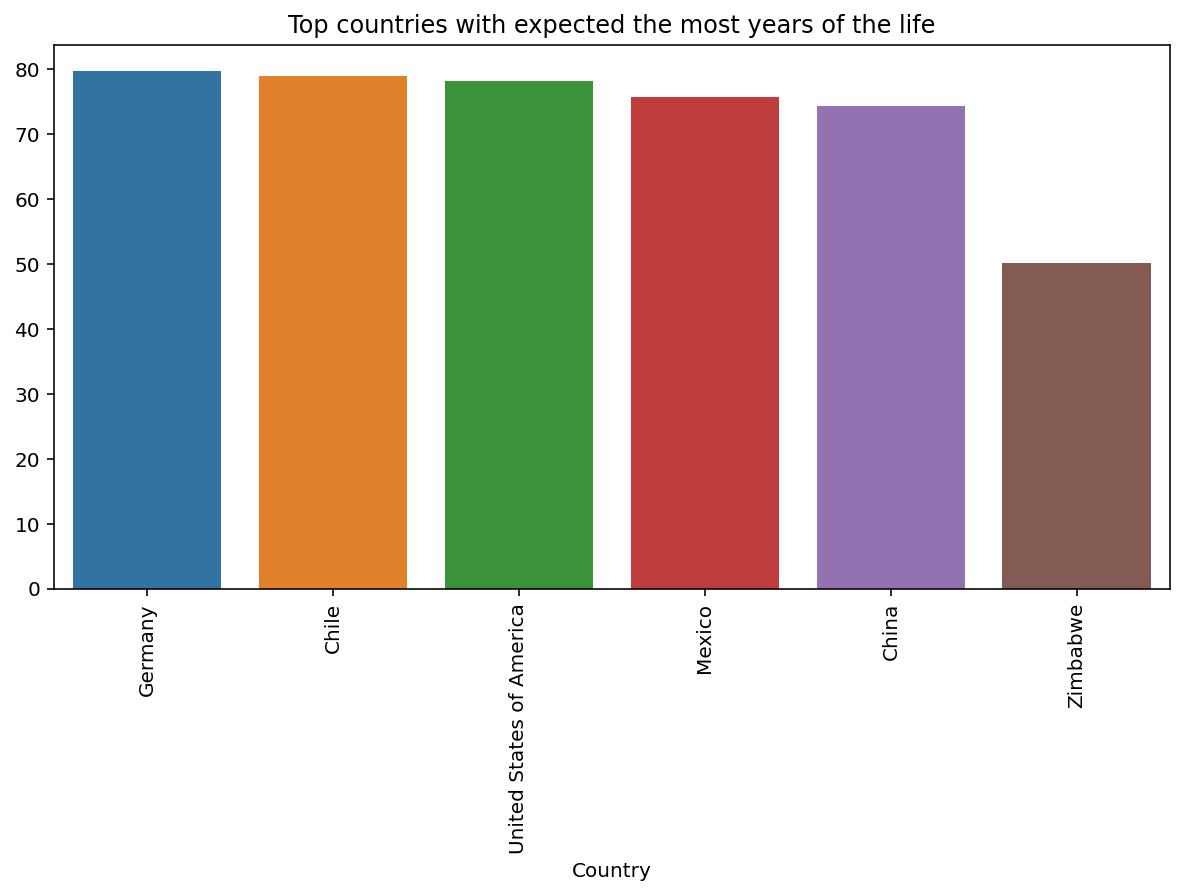

<Figure size 432x288 with 0 Axes>

In [113]:
order = ['Germany', 'Chile', 'United States of America', 'Mexico', 'China', 'Zimbabwe']
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.barplot(mean_counrty.index, mean_counrty.values, order=order)
plt.xticks(rotation=90)
plt.title('Top countries with expected the most years of the life')
plt.show()
plt.clf()

## Well, now let's look at GDP

In [114]:
mean_counrty_gdp = data.groupby('Country')['GDP'].mean()

In [115]:
mean_counrty_gdp

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64

/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


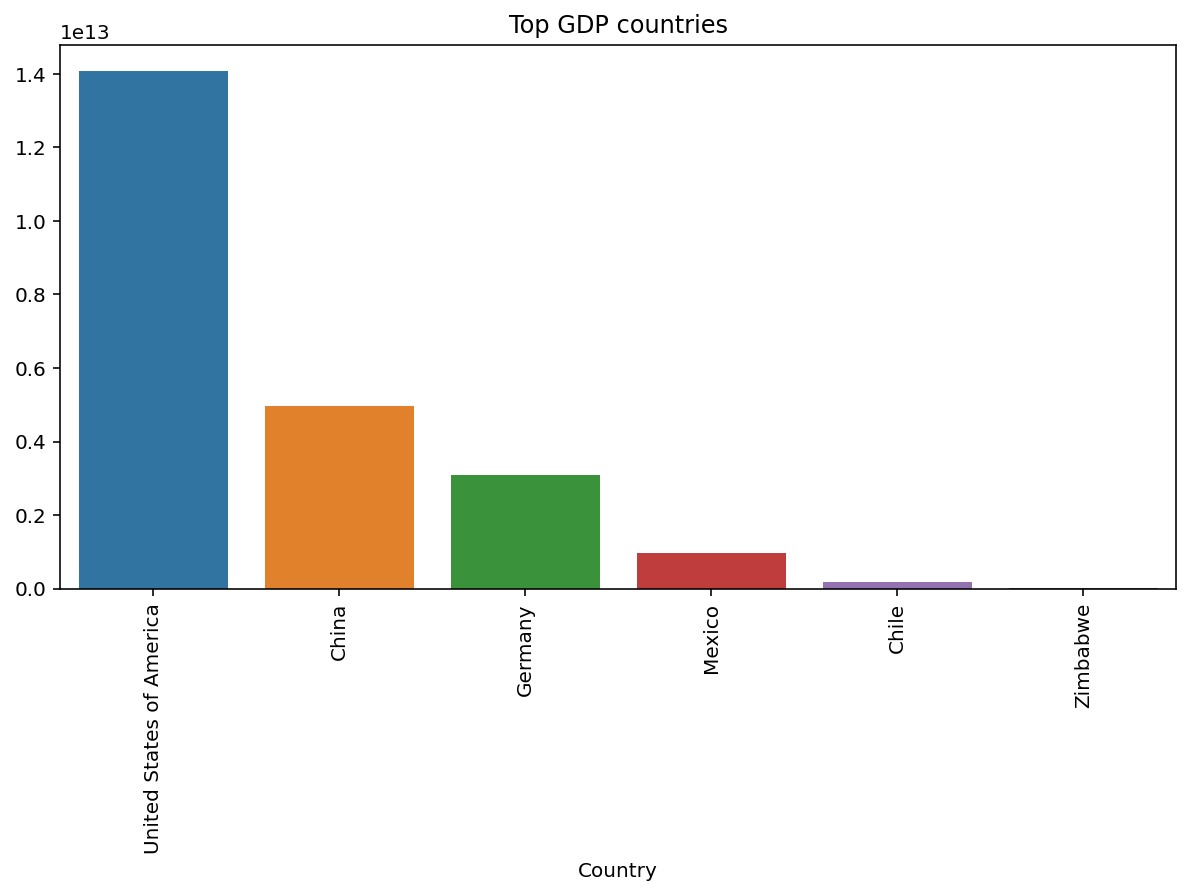

<Figure size 432x288 with 0 Axes>

In [116]:
order_gdp = ['United States of America', 'China', 'Germany','Mexico','Chile', 'Zimbabwe']
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.barplot(mean_counrty_gdp.index, mean_counrty_gdp.values, order=order_gdp)
plt.xticks(rotation=90)
plt.title('Top GDP countries')
plt.show()
plt.clf()

### As you see, there is have not any dependence or relationship between GDP and years of life, but let's take another visual to confirm it

## I'm gonna check the relationship between GDP and expected years of life on a scatterplot

/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


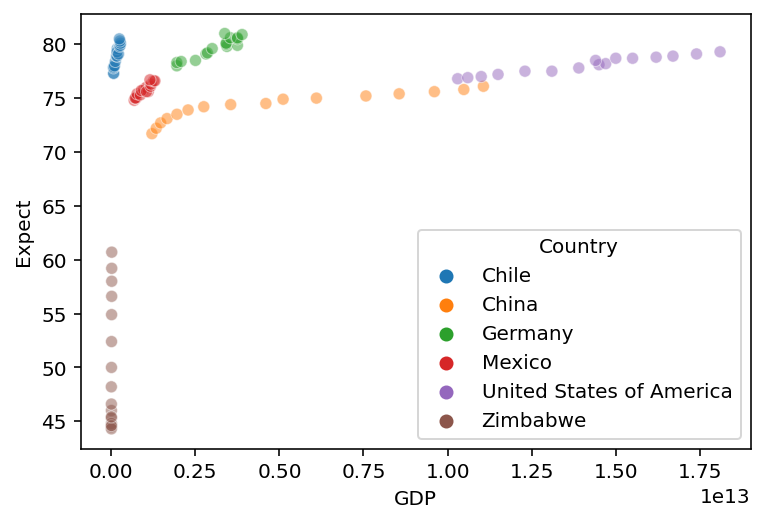

<Figure size 432x288 with 0 Axes>

In [117]:
sns.scatterplot(data.GDP, data.Expect, alpha=0.5, hue=data.Country)
plt.show()
plt.clf()

In [118]:
data.corr()

,Year,Expect,GDP
Year,1.000000,0.155050,0.208288
Expect,0.155050,1.000000,0.343207
GDP,0.208288,0.343207,1.000000


/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


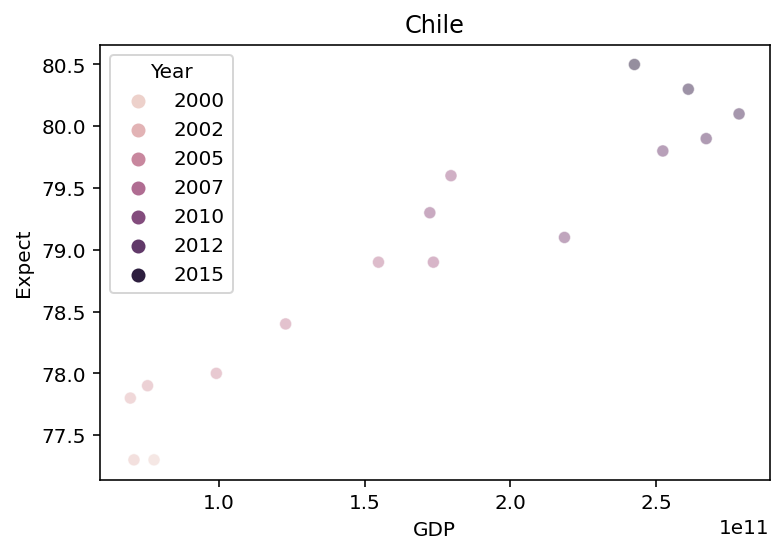

/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


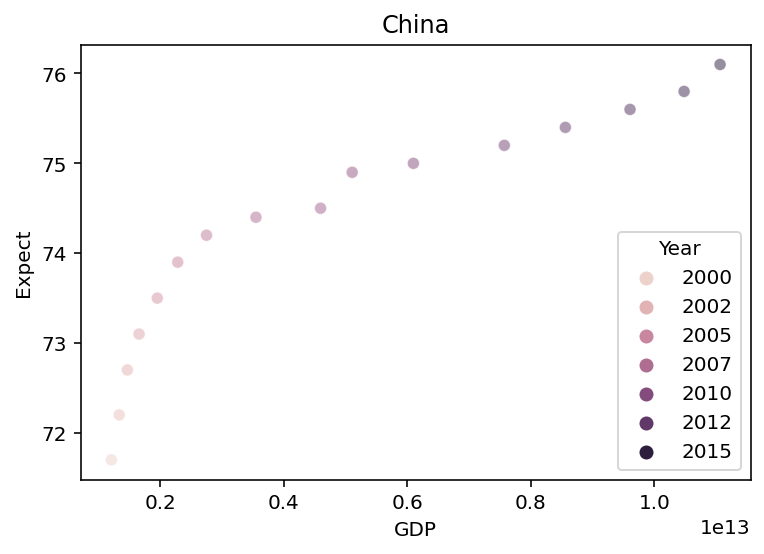

/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


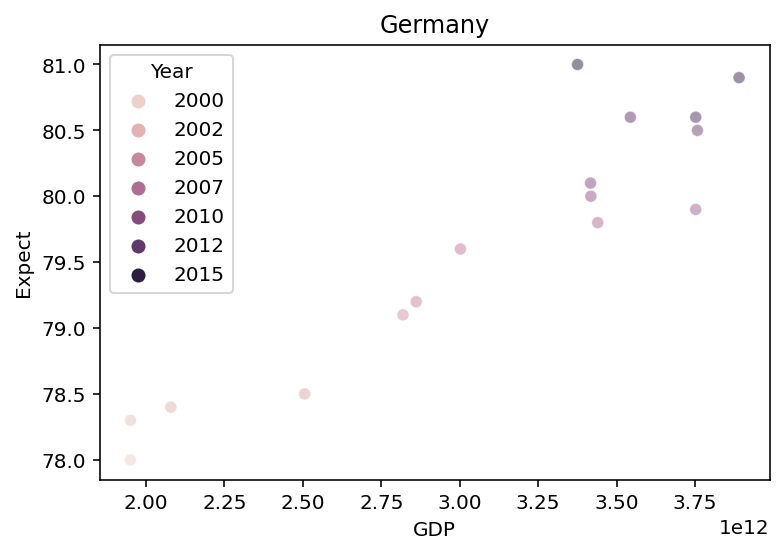

/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


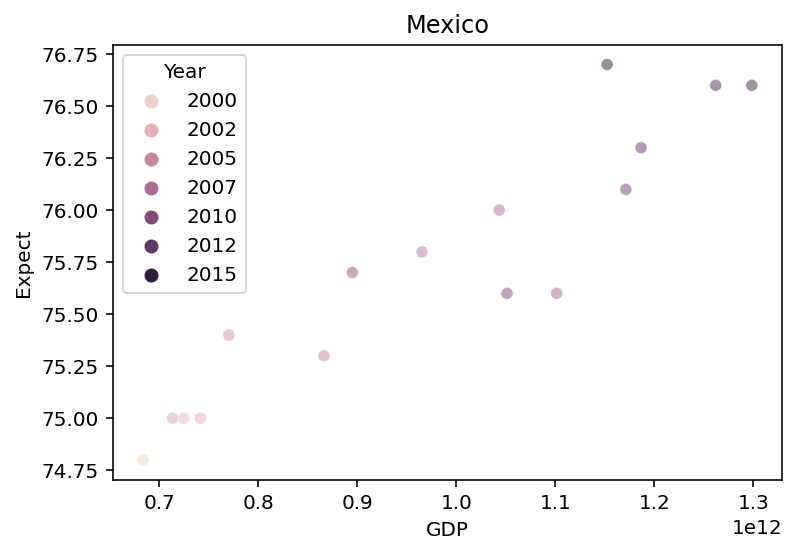

/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


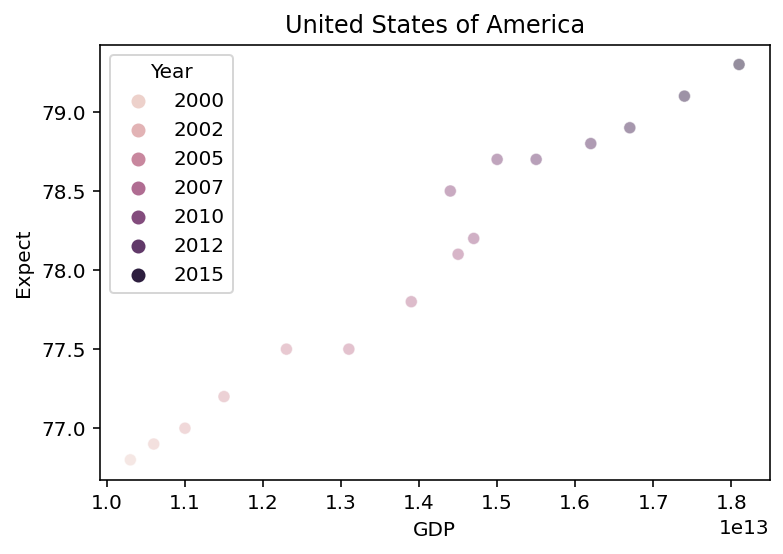

/Users/vy4chesl4v/Documents/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


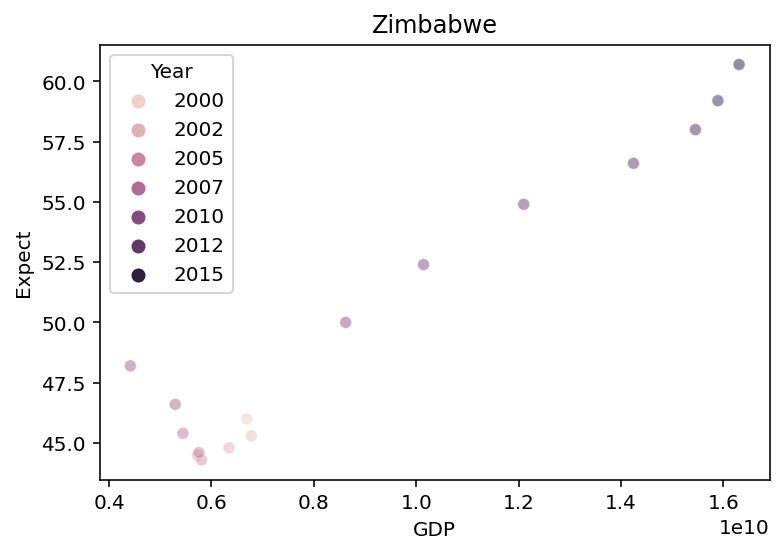

In [122]:
for country in data.Country.unique():
    data_country = data[data.Country == country]
    sns.scatterplot(data_country.GDP, data_country.Expect, alpha=0.5, hue=data.Year)
    plt.title(country)
    plt.show()

## However, here we are seeing another picture, If GDP gets bigger then and expected years of life get bigger. In addition, we have got the big enough coeff of corelation 0.343 between two variables

# --Conclusion--

# I can conclude there is have relationships between life expectancy and GDP, but GDP is not only one factor related with life expectancy, there are a lot of others factors, maybe such as territory, climate and more.